In [ ]:

import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_data.csv to heart_data.csv


In [ ]:
import os
print(os.listdir())

['.config', 'heart_data.csv', 'sample_data']


In [ ]:
heart_data = pd.read_csv('heart_data.csv')
heart_data.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

**Question 1:** Can we predict the likelihood of a heart attack based on variables like age, sex, chest pain type, cholesterol levels, and maximum heart rate achieved? How are the variables most correlated to heart attack related to each other?

{'Accuracy': 0.8524590163934426, 'Precision': 0.8709677419354839, 'Recall': 0.84375, 'F1 Score': 0.8571428571428571}
{'Accuracy': 0.8360655737704918, 'Precision': 0.84375, 'Recall': 0.84375, 'F1 Score': 0.84375}


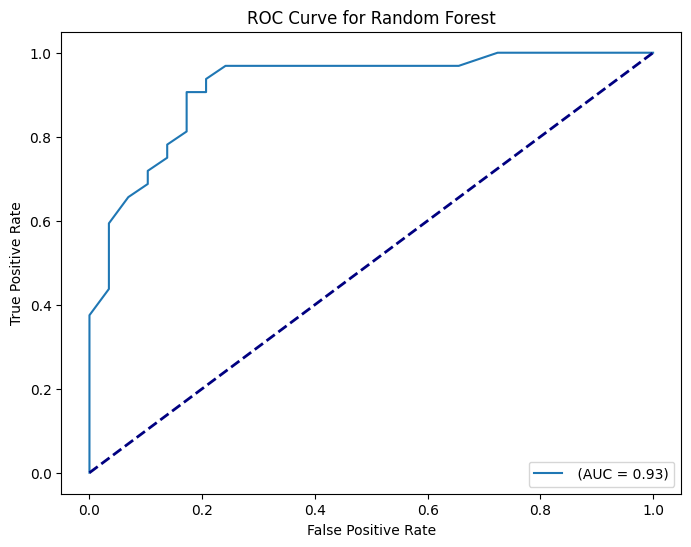

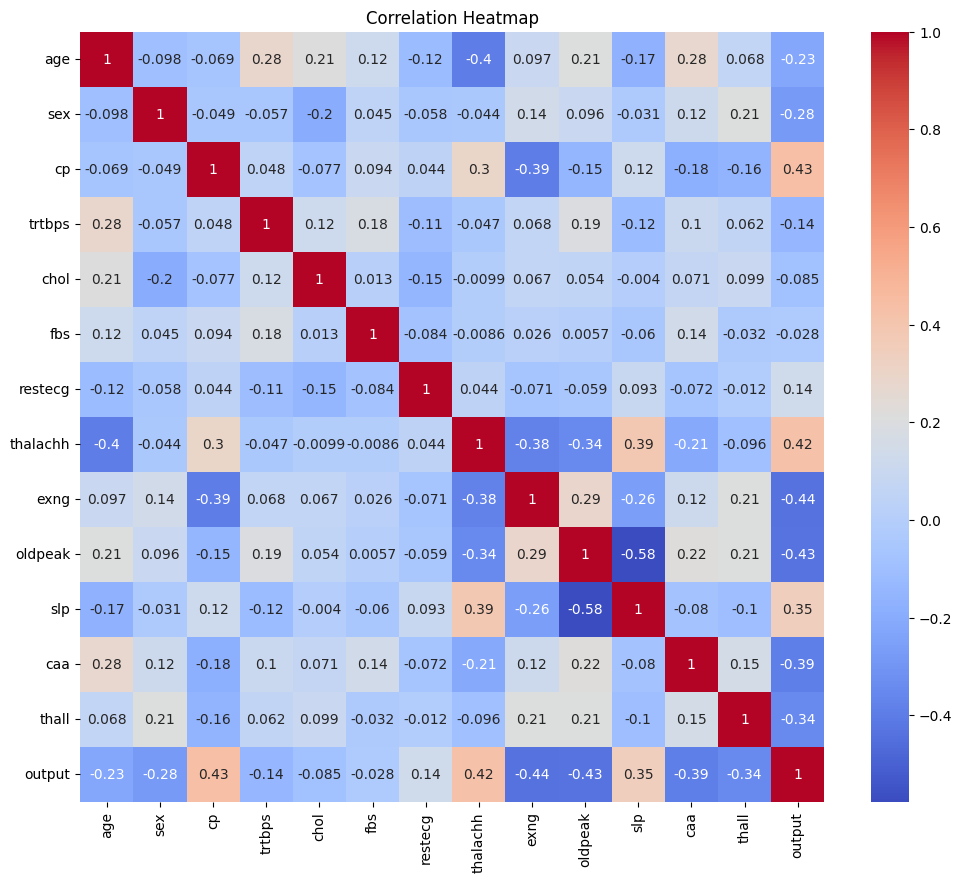

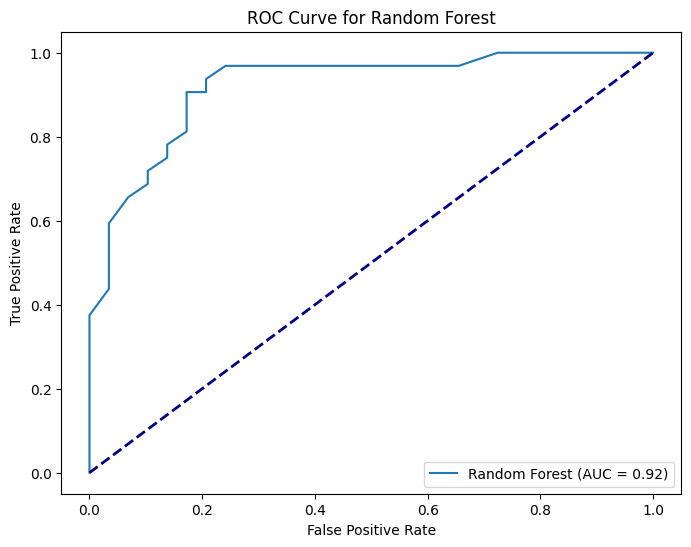

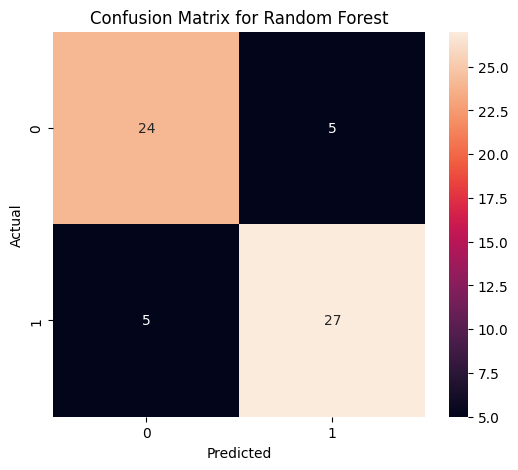

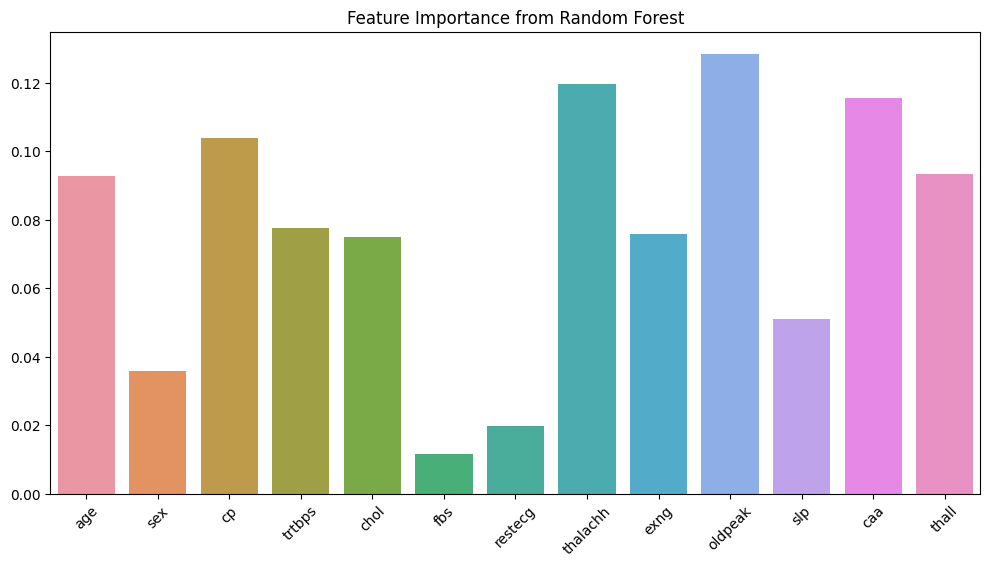

(age         0
 sex         0
 cp          0
 trtbps      0
 chol        0
 fbs         0
 restecg     0
 thalachh    0
 exng        0
 oldpeak     0
 slp         0
 caa         0
 thall       0
 output      0
 dtype: int64,
 {'Accuracy': 0.8524590163934426,
  'Precision': 0.8709677419354839,
  'Recall': 0.84375,
  'F1 Score': 0.8571428571428571},
 {'Accuracy': 0.8360655737704918,
  'Precision': 0.84375,
  'Recall': 0.84375,
  'F1 Score': 0.84375},
 0.8383060109289616,
 0.8118579234972676)

In [ ]:

#Clean
missing_values = heart_data.isnull().sum()

#Features
features = heart_data.drop(columns=['output'])
target = heart_data['output']

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

#Logistic Regression and Random Forest
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)

#Eval
log_reg_scores = {
    "Accuracy": accuracy_score(y_test, log_reg_preds),
    "Precision": precision_score(y_test, log_reg_preds),
    "Recall": recall_score(y_test, log_reg_preds),
    "F1 Score": f1_score(y_test, log_reg_preds)
}
print(log_reg_scores)
rf_scores = {
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": precision_score(y_test, rf_preds),
    "Recall": recall_score(y_test, rf_preds),
    "F1 Score": f1_score(y_test, rf_preds)
}
print(rf_scores)
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_cv_scores = cross_val_score(log_reg, features_scaled, target, cv=cv, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, features_scaled, target, cv=cv, scoring='accuracy')

# Mean cv scores
log_reg_cv_mean = log_reg_cv_scores.mean()
rf_cv_mean = rf_cv_scores.mean()

#Correlation
correlation_matrix = heart_data.corr()


# ROC Curve for RF
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

conf_matrix_rf = confusion_matrix(y_test, rf_preds)

feature_importance = rf.feature_importances_


#GRAPHS

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Graph
plt.figure(figsize=(12, 6))
sns.barplot(x=features.columns, y=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45)
plt.show()

(missing_values, log_reg_scores, rf_scores, log_reg_cv_mean, rf_cv_mean)

**Question 2:**
Can we identify distinct clusters based on demographics or health attributes? What characterizes clusters formed considering age, resting blood pressure,sex and cholesterol levels? What characterizes each cluster in terms of heart health risk factors?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

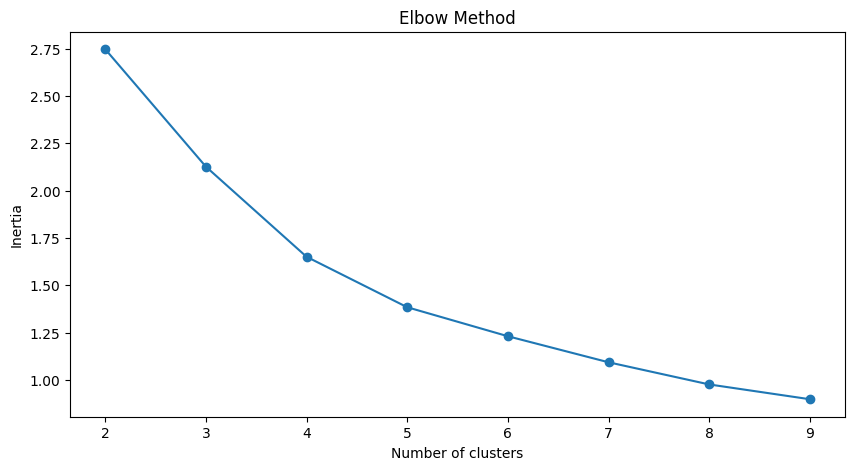

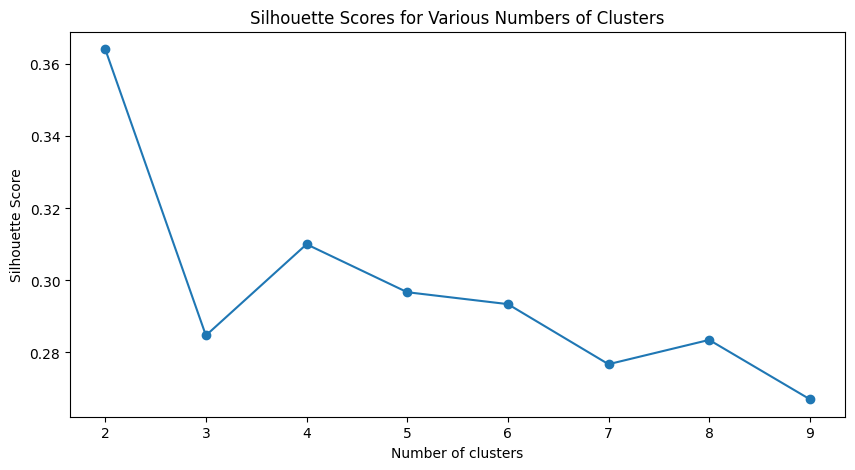

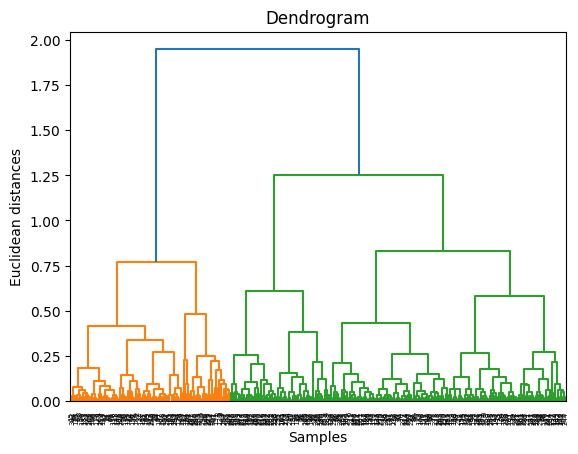

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               age       sex        cp      trtbps        chol       fbs  \
Cluster                                                                    
0        55.574627  0.694030  0.955224  131.626866  238.835821  0.171642   
1        50.172414  0.747126  1.275862  132.574713  201.839080  0.137931   
2        56.841463  0.597561  0.658537  130.609756  305.536585  0.121951   

          restecg    thalachh      exng   oldpeak       slp       caa  \
Cluster                                                                 
0        0.492537  146.723881  0.343284  1.033582  1.320896  0.723881   
1        0.632184  165.551724  0.172414  0.849425  1.551724  0.563218   
2        0.475610  137.548780  0.463415  1.251220  1.365854  0.914634   

            thall    output  
Cluster                      
0        2.291045  0.529851  
1        2.275862  0.701149  
2        2.390244  0.402439  


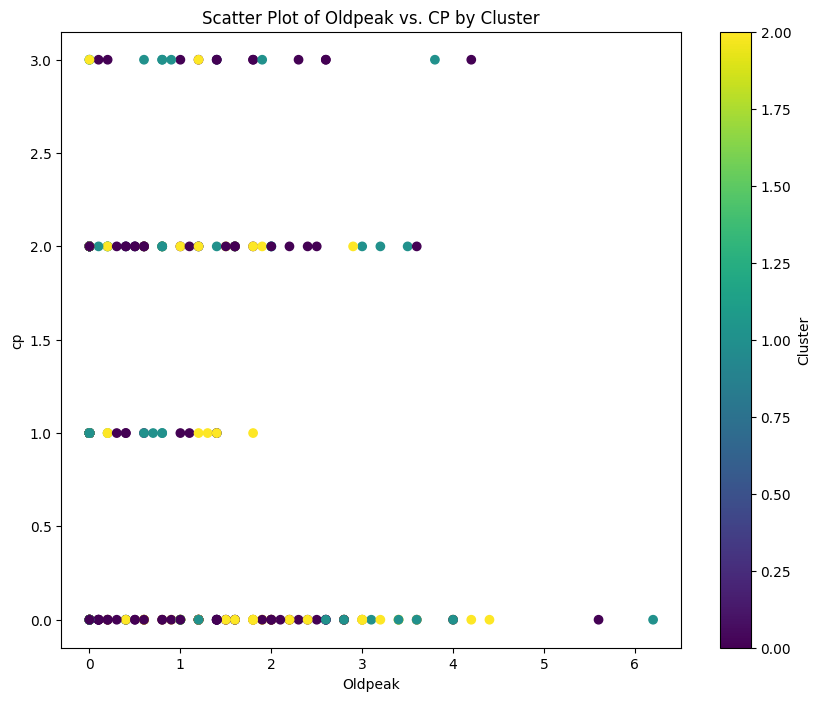

In [ ]:

# normalize variables
features = heart_data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
features_normalized2 = normalize(features)

# Elbow method and Silhouette score
inertia = []
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features_normalized2)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_normalized2, kmeans.labels_))

# Plot Elbow and Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Hierarchical Clustering
dendrogram = sch.dendrogram(sch.linkage(features_normalized2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

#  KMeans
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(features_normalized2)
heart_data['Cluster'] = clusters

# Analyze Cluster Characteristics
cluster_characteristics = heart_data.groupby('Cluster').mean()
print(cluster_characteristics)

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(heart_data['oldpeak'], heart_data['cp'], c=heart_data['Cluster'])
plt.title('Scatter Plot of Oldpeak vs. CP by Cluster')
plt.xlabel('Oldpeak')
plt.ylabel('cp')
plt.colorbar(label='Cluster')
plt.show()



**Question #3:** What is the effect of dimensionality reduction on our ability to predict heart attacks? Which reduced features are most informative for this prediction?

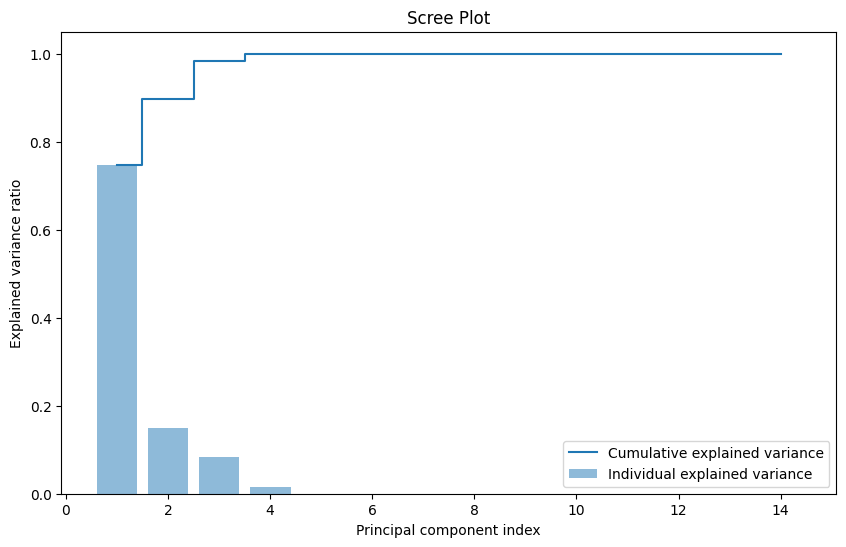

3
0.6483516483516484 0.6813186813186813               precision    recall  f1-score   support

           0       0.60      0.63      0.62        41
           1       0.69      0.66      0.67        50

    accuracy                           0.65        91
   macro avg       0.65      0.65      0.65        91
weighted avg       0.65      0.65      0.65        91
               precision    recall  f1-score   support

           0       0.64      0.66      0.65        41
           1       0.71      0.70      0.71        50

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91



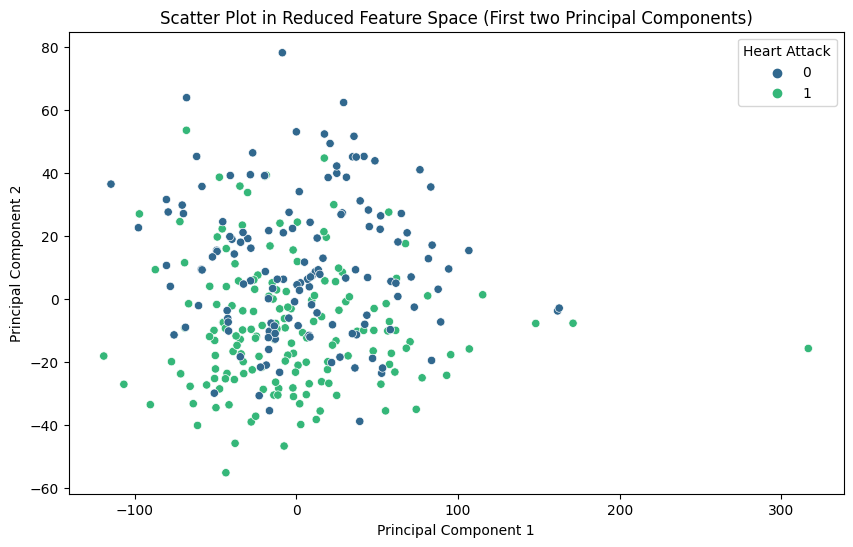

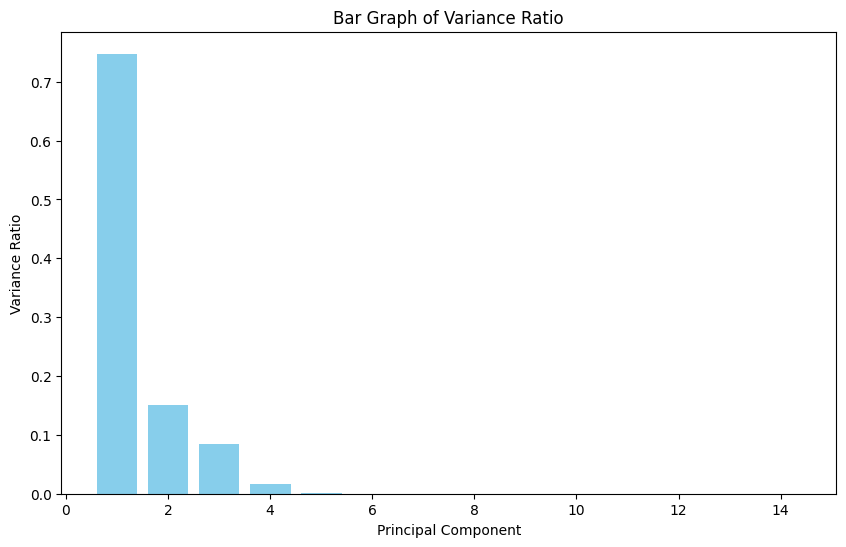

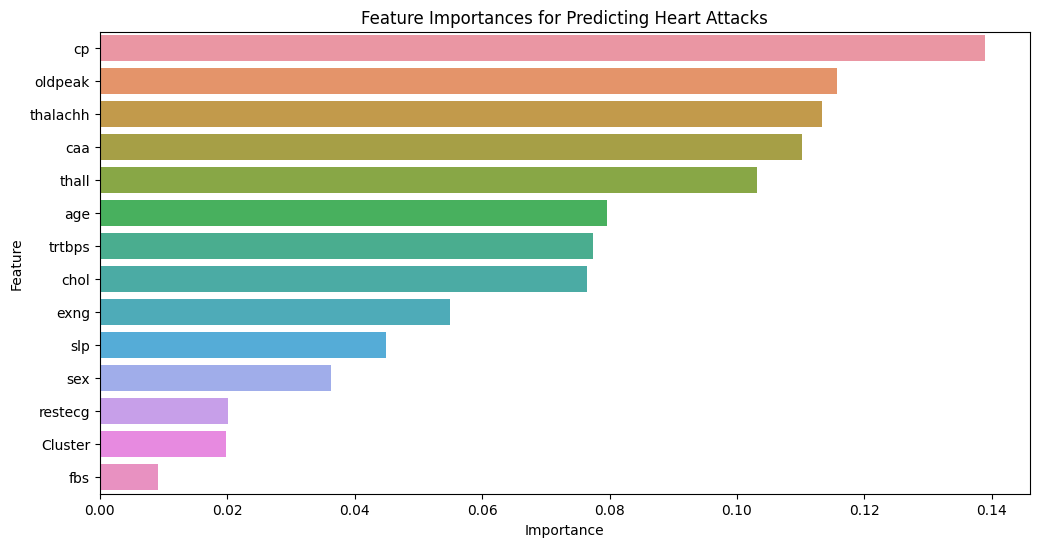

['cp', 'oldpeak', 'thalachh']


In [ ]:
X = heart_data.drop('output', axis=1)
y = heart_data['output']

#  PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

explained_variance_ratio


n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
X_pca_reduced = X_pca[:, :n_components]
print(n_components)


X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Eval
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
report_gbc = classification_report(y_test, y_pred_gbc)
report_rfc = classification_report(y_test, y_pred_rfc)

print(accuracy_gbc, accuracy_rfc, report_gbc, report_rfc)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Scatter Plot in Reduced Feature Space (First two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Attack')
plt.show()

# Bar graph of variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Bar Graph of Variance Ratio')
plt.show()


# Feature Importance Analysis
rfc_full = RandomForestClassifier()
rfc_full.fit(X, y)

# feature importances
feature_importances = rfc_full.feature_importances_

# DataFrame
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Predicting Heart Attacks')
plt.show()

#  top features
top_features = importance_df['Feature'].head(n_components).tolist()
print(top_features)
